In [1]:
import pandas as pd
path1 = "D:/TON IOT/Processed_datasets/Processed_datasets/Processed_Linux_dataset/linux_process_1.csv"
path2 = "D:/TON IOT/Processed_datasets/Processed_datasets/Processed_Linux_dataset/linux_process_2.csv"
linux_pro1 = pd.read_csv(path1)
linux_pro2 = pd.read_csv(path2)
print(linux_pro1.shape)
print(linux_pro2.shape)
linux_pro = pd.concat([linux_pro1, linux_pro2])

print(linux_pro.shape)
linux_pro.head()

(1000000, 17)
(927968, 17)
(1927968, 17)


,ts,PID,TRUN,TSLPI,TSLPU,POLI,NICE,PRI,RTPR,CPUNR,Status,EXC,State,CPU,CMD,label,type
0,1554218915,3257,0,23,0,norm,0,120,0,2,N,0,S,0.13,Web-Content,0,normal
1,1554218920,1442,0,1,0,norm,0,120,0,0,N,0,S,0.09,Xorg,0,normal
2,1554218925,3197,0,63,0,norm,0,120,0,3,N,0,S,0.06,firefox,0,normal
3,1554218930,2774,0,8,0,norm,0,120,0,0,N,0,S,0.06,compiz,0,normal
4,1554218935,2797,0,5,0,norm,0,120,0,0,N,0,S,0.04,nautilus,0,normal


In [2]:
linux_pro.drop('ts', axis = 1, inplace=True)
linux_pro.drop('type', axis = 1, inplace= True)

linux_pro.head()

,PID,TRUN,TSLPI,TSLPU,POLI,NICE,PRI,RTPR,CPUNR,Status,EXC,State,CPU,CMD,label
0,3257,0,23,0,norm,0,120,0,2,N,0,S,0.13,Web-Content,0
1,1442,0,1,0,norm,0,120,0,0,N,0,S,0.09,Xorg,0
2,3197,0,63,0,norm,0,120,0,3,N,0,S,0.06,firefox,0
3,2774,0,8,0,norm,0,120,0,0,N,0,S,0.06,compiz,0
4,2797,0,5,0,norm,0,120,0,0,N,0,S,0.04,nautilus,0


In [3]:
linux_pro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1927968 entries, 0 to 927967
Data columns (total 15 columns):
 #   Column  Dtype  
---  ------  -----  
 0   PID     int64  
 1   TRUN    int64  
 2   TSLPI   int64  
 3   TSLPU   int64  
 4   POLI    object 
 5   NICE    int64  
 6   PRI     int64  
 7   RTPR    int64  
 8   CPUNR   int64  
 9   Status  object 
 10  EXC     int64  
 11  State   object 
 12  CPU     float64
 13  CMD     object 
 14  label   int64  
dtypes: float64(1), int64(10), object(4)
memory usage: 235.3+ MB


In [4]:
linux_pro['State'].replace('S',  '-2', inplace=True)
linux_pro['State'].replace('I',  '2', inplace=True)
linux_pro['State'].replace('R',  '1', inplace=True)
linux_pro['State'].replace('E',  '0', inplace=True)
linux_pro['State'].replace('Z',  '4', inplace=True)
linux_pro['State'].replace('D',  '-1', inplace=True)
linux_pro['State'].replace('T',  '3', inplace=True)
linux_pro['State']=linux_pro['State'].astype(int)

linux_pro['Status'].replace('-',  '-1', inplace=True)
linux_pro['Status'].replace('NE',  '1', inplace=True)
linux_pro['Status'].replace('N',  '2', inplace=True)
linux_pro['Status'].replace('NS',  '3', inplace=True)
linux_pro['Status'].replace('C',  '4', inplace=True)
linux_pro['Status'].replace('NC',  '5', inplace=True)
linux_pro['Status']=linux_pro['Status'].astype(int)

linux_pro['POLI'].replace('-',  '-1', inplace=True)
linux_pro['POLI'].replace('norm',  '1', inplace=True)
linux_pro['POLI']=linux_pro['POLI'].astype(int)

In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
linux_pro['CMD'] = le.fit_transform(linux_pro['CMD'])

col:  PID


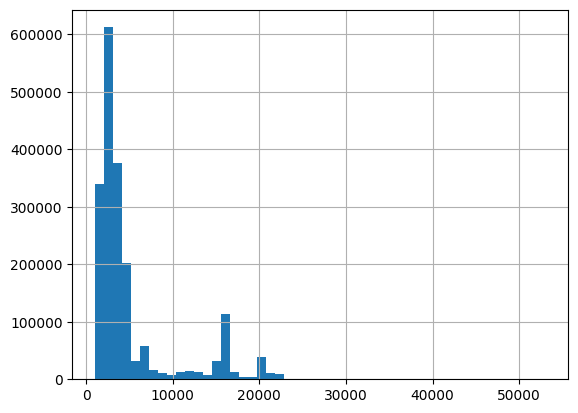

col:  TRUN


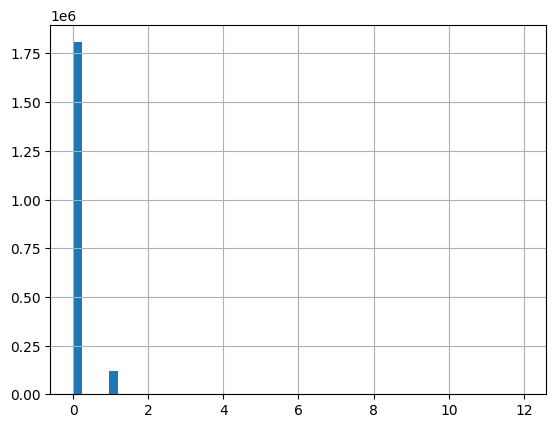

col:  TSLPI


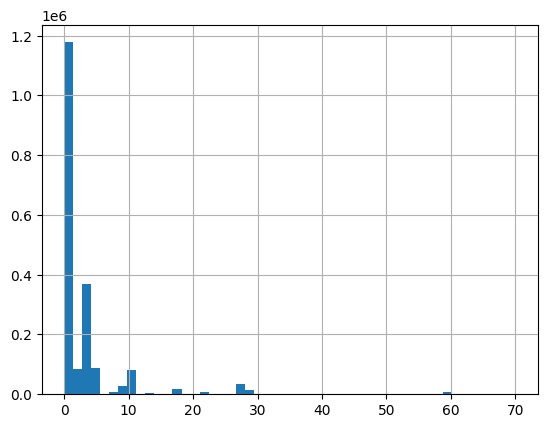

col:  TSLPU


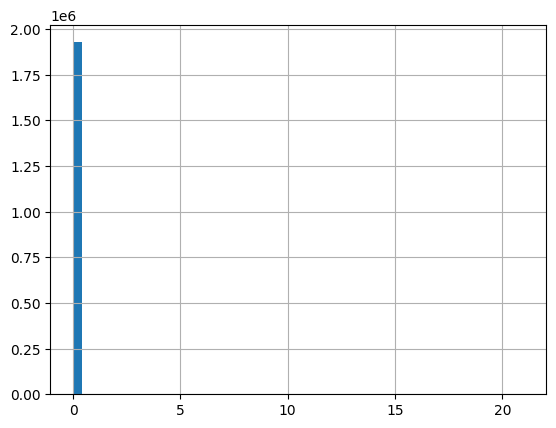

col:  POLI


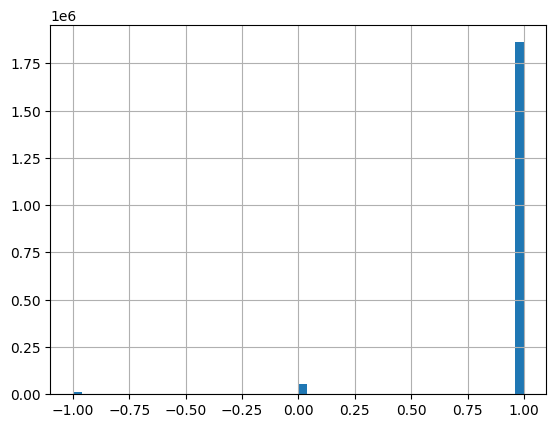

col:  NICE


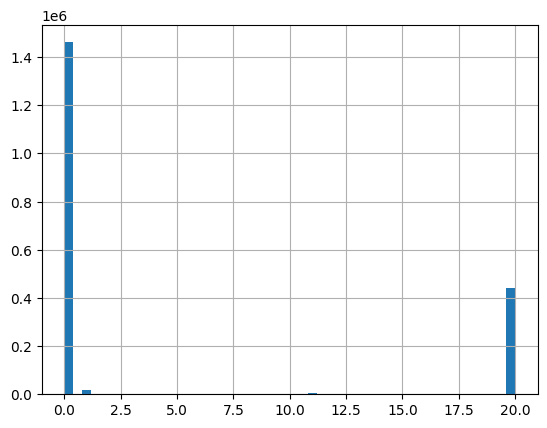

col:  PRI


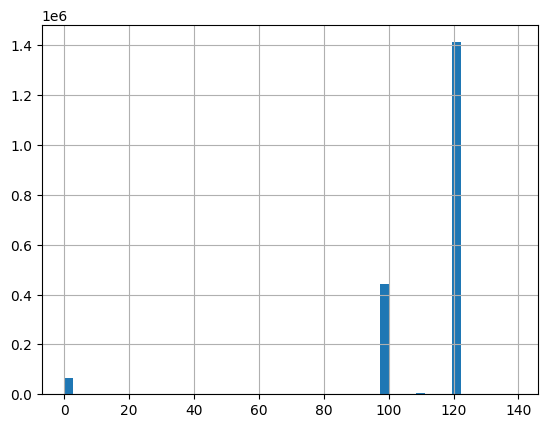

col:  RTPR


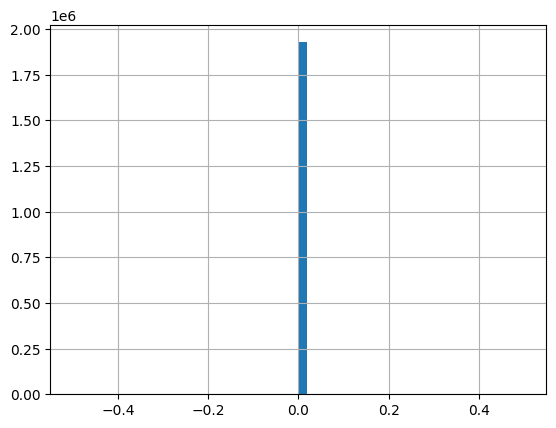

col:  CPUNR


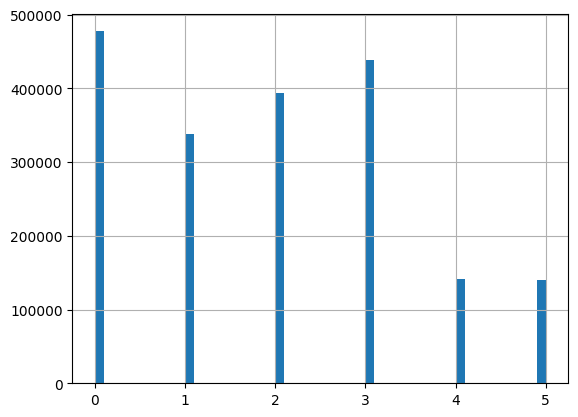

col:  Status


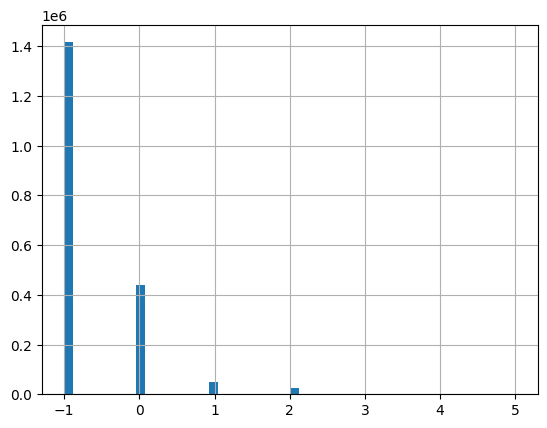

col:  EXC


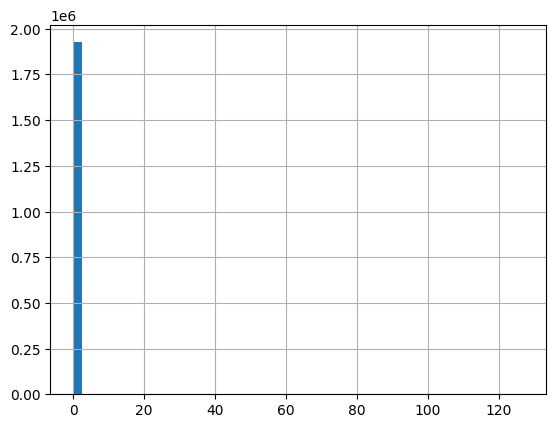

col:  State


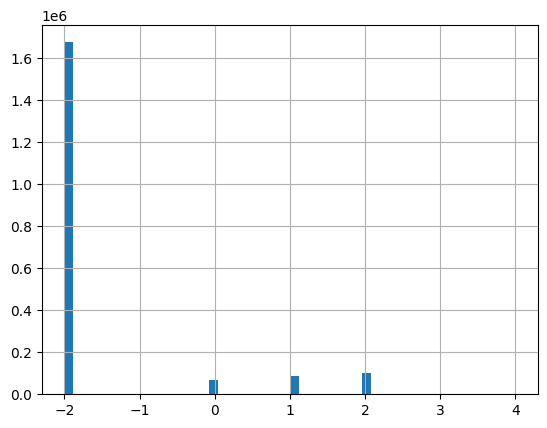

col:  CPU


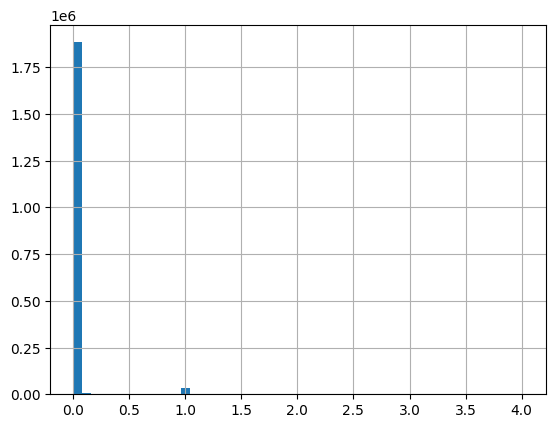

col:  CMD


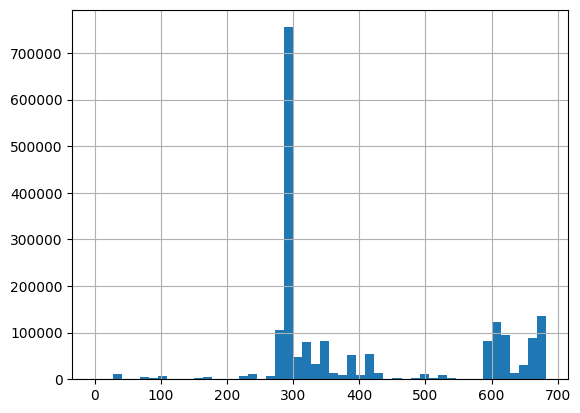

col:  label


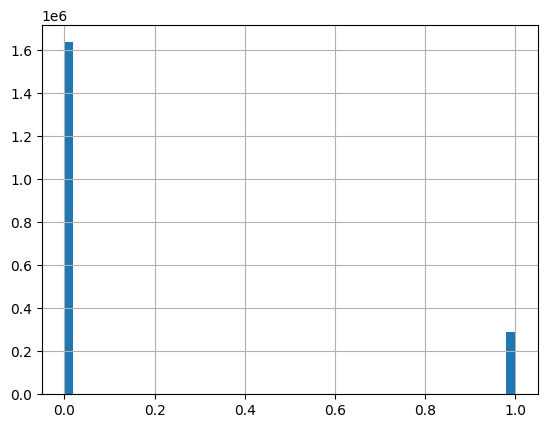

In [6]:
import matplotlib.pyplot as plt
columns = linux_pro.columns

for col in columns:
    print("col: ", col)
    linux_pro[col].hist(bins = 50)
    plt.show()

In [7]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=8, shuffle = True, random_state=3)

In [8]:
from sklearn.metrics import f1_score, accuracy_score

def get_accuracy_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred= model.predict(x_test)
    modelAccuracyTest = accuracy_score(y_pred,y_test)
    return modelAccuracyTest

def get_f1_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred= model.predict(x_test)
    modelF1Test = f1_score(y_pred,y_test)
    return modelF1Test

In [9]:
x = linux_pro.drop('label', axis = 1)
y = linux_pro['label']

# Without Oversampling

In [10]:
from sklearn.tree import DecisionTreeClassifier
from statistics import mean
Dtree_accuracy_scores = []
Dtree_f1_scores = []

for train_index, test_index in skf.split(x, y):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

    Dtree_accuracy_scores.append(get_accuracy_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))
    Dtree_f1_scores.append(get_f1_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))

print('Accuracy Score: ',mean(Dtree_accuracy_scores))
print('F1 Score:', mean(Dtree_f1_scores))

Accuracy Score:  0.8792116881607993
F1 Score: 0.5026902952389011


# Oversampling

In [13]:
from imblearn.over_sampling import SMOTE
import numpy as np
#Seeing the value count before oversampling
unique, count = np.unique(y_train, return_counts = True)
y_train_dict_value_count = {k:v for (k,v) in zip(unique, count)}
print("Before oversampling",y_train_dict_value_count)

sm = SMOTE(random_state=12)
x_train_sm, y_train_sm = sm.fit_sample(x_train, y_train)

# Seeing the value count after oversampling
unique, count = np.unique(y_train_sm, return_counts = True)
y_train_smote_value_count = {k:v for (k,v) in zip(unique, count)}
print("After oversampling",y_train_smote_value_count)

Before oversampling {0: 1253025, 1: 1253025}
After oversampling {0: 1253025, 1: 1253025}


In [14]:
from sklearn.tree import DecisionTreeClassifier
from statistics import mean
Dtree_accuracy_scores = []
Dtree_f1_scores = []

for train_index, test_index in skf.split(x_train_sm, y_train_sm):
    x_train, x_test, y_train, y_test = x_train_sm.iloc[train_index], x_train_sm.iloc[test_index], y_train_sm.iloc[train_index], y_train_sm.iloc[test_index]
    Dtree_accuracy_scores.append(get_accuracy_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))
    Dtree_f1_scores.append(get_f1_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))

print('Accuracy Score:',mean(Dtree_accuracy_scores))
print('F1 Score:', mean(Dtree_f1_scores))

Accuracy Score: 0.8148424814097927
F1 Score: 0.8258987184304823


# ^HUGE IMPROVEMENT when oversampled

# Undersampling

<AxesSubplot: xlabel='label', ylabel='count'>

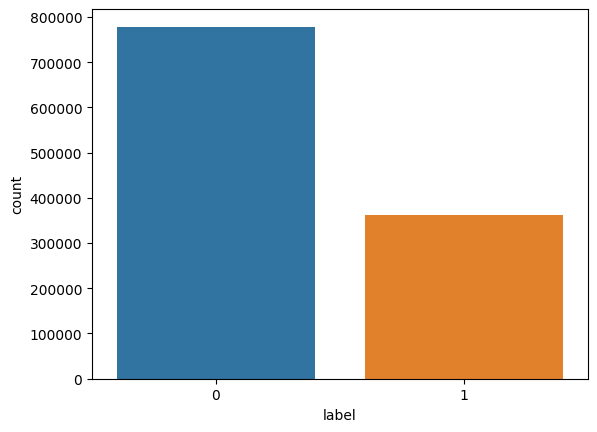

In [15]:
target = 'label'

import numpy as np
minority_class_len = len(linux_pro[linux_pro[target] == 1])
majority_class_indices = linux_pro[linux_pro[target] == 0].index

random_majority_indices = np.random.choice(majority_class_indices, minority_class_len, replace=False)

minority_class_indices = linux_pro[linux_pro[target] == 1].index

under_sample_indices = np.concatenate([minority_class_indices, random_majority_indices])

under_sample = linux_pro.loc[under_sample_indices]

import seaborn as sns
sns.countplot(x = target, data = under_sample)

In [16]:
und_x = under_sample.loc[:, linux_pro.columns !=target]
und_y = under_sample.loc[:, linux_pro.columns == target]

from sklearn.tree import DecisionTreeClassifier
from statistics import mean
Dtree_accuracy_scores = []
Dtree_f1_scores = []

for train_index, test_index in skf.split(und_x, und_y):
    x_train, x_test, y_train, y_test = und_x.iloc[train_index], und_x.iloc[test_index], und_y.iloc[train_index], und_y.iloc[test_index]
    Dtree_accuracy_scores.append(get_accuracy_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))
    Dtree_f1_scores.append(get_f1_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))

print('Accuracy Score:',mean(Dtree_accuracy_scores))
print('F1 Score:', mean(Dtree_f1_scores))

Accuracy Score: 0.8221326636841798
F1 Score: 0.6884468423302409


# Undersampling better than no sampling